In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
hockey_file = Path("Resources/players.csv")

player_file = Path("Resources/player_summary.xlsx")
goalie_file = Path("Resources/goalie_summary.xlsx")
defence_file = Path("Resources/defensemen_summary.xlsx")




# Displaying dataframe for all hockey players 

hockey_summary_df = pd.read_csv(hockey_file, encoding="utf-8")
hockey_summary_df.head(10)

,player_id,name,nationality,pos,birth_date,height_in,height_cm,weight_lb,weight_kg,team_id,team_id2,team_id3,birth_city,birth_state_prov,hand,team
0,8465009,Z. Chara,SVK,D,1977-03-18 00:00:00,"6' 9""",205.74,250.0,113.398000,6,0,0,Trencin,NaN,L,BOS
1,8466138,J. Thornton,CAN,C,1979-07-02 01:00:00,"6' 4""",193.04,220.0,99.790240,28,0,0,London,ON,L,SJS
2,8466139,P. Marleau,CAN,C,1979-09-15 01:00:00,"6' 2""",187.96,215.0,97.522280,28,5,0,Aneroid,SK,L,SJS
3,8468493,R. Hainsey,USA,D,1981-03-24 00:00:00,"6' 3""",190.50,210.0,95.254320,9,0,0,Bolton,CT,L,OTT
4,8468508,J. Williams,CAN,RW,1981-10-04 01:00:00,"6' 1""",185.42,188.0,85.275296,12,0,0,Cobourg,ON,R,CAR
5,8468674,D. Engelland,CAN,D,1982-04-03 01:00:00,"6' 2""",187.96,214.0,97.068688,54,0,0,Edmonton,AB,R,VGK
6,8469454,I. Kovalchuk,RUS,RW,1983-04-15 01:00:00,"6' 3""",190.50,230.0,104.326160,26,8,15,Tver,NaN,R,LAK
7,8469455,J. Spezza,CAN,C,1983-06-13 01:00:00,"6' 3""",190.50,214.0,97.068688,10,0,0,Toronto,ON,R,TOR
8,8469459,M. Koivu,FIN,C,1983-03-12 00:00:00,"6' 3""",190.50,215.0,97.522280,30,0,0,Turku,NaN,L,MIN
9,8469465,D. Hamhuis,CAN,D,1982-12-13 00:00:00,"6' 1""",185.42,204.0,92.532768,18,0,0,Smithers,BC,L,NSH


In [3]:
# Data columns info

hockey_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_id         757 non-null    int64  
 1   name              757 non-null    object 
 2   nationality       757 non-null    object 
 3   pos               757 non-null    object 
 4   birth_date        757 non-null    object 
 5   height_in         757 non-null    object 
 6   height_cm         757 non-null    float64
 7   weight_lb         757 non-null    float64
 8   weight_kg         757 non-null    float64
 9   team_id           757 non-null    int64  
 10  team_id2          757 non-null    int64  
 11  team_id3          757 non-null    int64  
 12  birth_city        757 non-null    object 
 13  birth_state_prov  532 non-null    object 
 14  hand              757 non-null    object 
 15  team              757 non-null    object 
dtypes: float64(3), int64(4), object(9)
memory us

In [4]:
# Determining the nationalities of hockey player as per the database.

nationality = hockey_summary_df["nationality"].unique().tolist()

nationality

['SVK',
 'CAN',
 'USA',
 'RUS',
 'FIN',
 'DNK',
 'SWE',
 'CZE',
 'SVN',
 'AUT',
 'CHE',
 'FRA',
 'NOR',
 'DEU',
 'LVA',
 'GBR',
 'NLD',
 'UKR']

In [5]:
# Birthcity of the hockey players

birthcity = hockey_summary_df["birth_city"].unique().tolist()

birthcity

['Trencin',
 'London',
 'Aneroid',
 'Bolton',
 'Cobourg',
 'Edmonton',
 'Tver',
 'Toronto',
 'Turku',
 'Smithers',
 'Vantaa',
 'Herning',
 'Winnipeg',
 'Karlskrona',
 'Thunder Bay',
 'Madison',
 'Shaunavon',
 'Ithaca',
 'Richmond',
 'Minneapolis',
 'Regina',
 'Barrie',
 'Hingham',
 'Peterborough',
 'Gothenburg',
 'Ancienne-Lorette',
 'Sicamous',
 'Belleville',
 'Anchorage',
 'Plover',
 'Moscow',
 'Magnitogorsk',
 'Maple Ridge',
 'Plymouth',
 'Nizhny Tagil',
 'Calgary',
 'Meadow Lake',
 'Malmö',
 'Grand Rapids',
 'Sternberk',
 'Bojnice',
 'Ostersund',
 'Ostrava',
 'Vancouver',
 'Quebec City',
 'Cole Harbour',
 'Cherry Hill',
 'Indianapolis',
 'Jesenice',
 'Everett',
 'Virginia',
 'Whitby',
 'Montreal',
 'Muskegon',
 'Caroline',
 'Boston',
 'Trebic',
 'Eksjo',
 'St. Andrews',
 'Oxford',
 'Tibro',
 'Sollentuna',
 'Trenton',
 'Halifax',
 'Buffalo',
 'Bloomington',
 'St. Paul',
 'Salt Lake City',
 'Narva',
 'Welland',
 'Ann Arbor',
 'Hearst',
 'Hull',
 'Villach',
 'Gävle',
 'Kladno',
 'Yaro

In [6]:
# Displaying players by first letter of first name and then their last name. 

def fix_name(x):
    names = x.split(" ")
    first_initial = names[0][0]
    return f"{first_initial}. {names[1]}"

In [7]:
# Player summary of the top 40 players by points currently in the NHL. 

player_summary_df = pd.read_excel(player_file, engine="openpyxl")
player_summary_df["name"]= player_summary_df["Player"].map(fix_name)
player_summary_df.rename(columns={"Team": "team"}, inplace=True)

player_summary_df.head()

,Player,Season,team,S/C,Pos,GP,G,A,P,+/-,...,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%,name
0,Nikita Kucherov,20232024,TBL,L,R,40,28,39,67,-3,...,30,0,0,1,5,178,15.7,21:46,50,N. Kucherov
1,Nathan MacKinnon,20232024,COL,R,C,40,22,43,65,9,...,26,0,0,2,4,179,12.3,22:49,49.1,N. MacKinnon
2,David Pastrnak,20232024,BOS,R,R,38,24,31,55,11,...,22,0,0,0,4,189,12.7,19:46,28.6,D. Pastrnak
3,Artemi Panarin,20232024,NYR,R,L,38,25,30,55,2,...,23,0,0,0,2,159,15.7,19:57,14.3,A. Panarin
4,Connor McDavid,20232024,EDM,L,C,34,14,40,54,10,...,20,0,0,0,0,104,13.5,21:19,50.4,C. McDavid


In [8]:
# Merging the data from the hockey player database (previous) and the top 40 players by points database. 

player_merge_df = pd.merge(player_summary_df, hockey_summary_df, on=["name", "team"])

player_merge_df.head(15)

,Player,Season,team,S/C,Pos,GP,G,A,P,+/-,...,height_in,height_cm,weight_lb,weight_kg,team_id,team_id2,team_id3,birth_city,birth_state_prov,hand
0,Nikita Kucherov,20232024,TBL,L,R,40,28,39,67,-3,...,"5' 11""",180.34,178.0,80.739376,14,0,0,Maykop,NaN,L
1,Nathan MacKinnon,20232024,COL,R,C,40,22,43,65,9,...,"6' 0""",182.88,205.0,92.986360,21,0,0,Halifax,NS,R
2,David Pastrnak,20232024,BOS,R,R,38,24,31,55,11,...,"6' 0""",182.88,181.0,82.100152,6,0,0,Havirov,NaN,R
3,Artemi Panarin,20232024,NYR,R,L,38,25,30,55,2,...,"5' 11""",180.34,168.0,76.203456,3,0,0,Korkino,NaN,R
4,Connor McDavid,20232024,EDM,L,C,34,14,40,54,10,...,"6' 1""",185.42,192.0,87.089664,22,0,0,Richmond Hill,ON,L
5,William Nylander,20232024,TOR,R,R,37,21,33,54,5,...,"6' 0""",182.88,191.0,86.636072,10,0,0,Calgary,AB,R
6,J.T. Miller,20232024,VAN,L,C,39,18,35,53,18,...,"6' 1""",185.42,218.0,98.883056,23,0,0,East Palestine,OH,L
7,Mikko Rantanen,20232024,COL,L,R,40,20,30,50,1,...,"6' 4""",193.04,211.0,95.707912,21,0,0,Nousiainen,NaN,L
8,Quinn Hughes,20232024,VAN,L,D,39,10,39,49,26,...,"5' 10""",177.80,170.0,77.110640,23,0,0,Orlando,FL,L
9,Elias Pettersson,20232024,VAN,L,C,39,17,31,48,13,...,"6' 2""",187.96,176.0,79.832192,23,0,0,Sundsvall,NaN,L


In [9]:
# Column info

player_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            39 non-null     object 
 1   Season            39 non-null     int64  
 2   team              39 non-null     object 
 3   S/C               39 non-null     object 
 4   Pos               39 non-null     object 
 5   GP                39 non-null     int64  
 6   G                 39 non-null     int64  
 7   A                 39 non-null     int64  
 8   P                 39 non-null     int64  
 9   +/-               39 non-null     int64  
 10  PIM               39 non-null     int64  
 11  P/GP              39 non-null     float64
 12  EVG               39 non-null     int64  
 13  EVP               39 non-null     int64  
 14  PPG               39 non-null     int64  
 15  PPP               39 non-null     int64  
 16  SHG               39 non-null     int64  
 17 

In [10]:
# Merged dataset displaying points by nationality. 

nationality_points = player_merge_df.groupby("nationality")["P"].sum()

nationality_points

nationality
CAN    633
CZE     55
DEU     42
FIN    139
RUS    162
SVN     36
SWE    304
USA    346
Name: P, dtype: int64

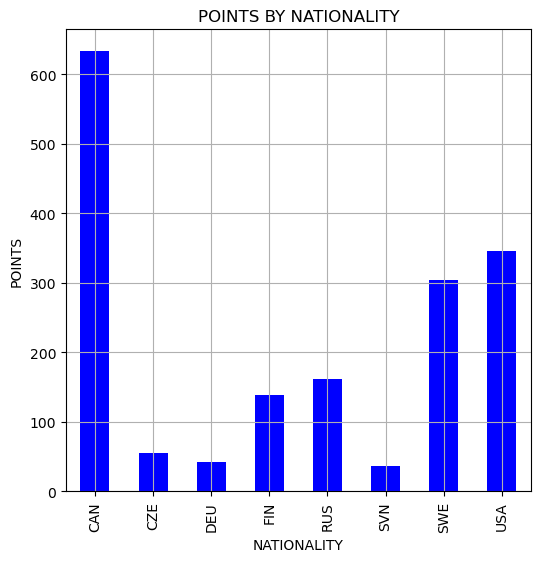

<Figure size 640x480 with 0 Axes>

In [11]:
# Bar Chart for points by Nationality for top 40 players by points in NHL 

points_chart = nationality_points.plot(kind="bar", color="blue", figsize=(6,6))
plt.title("POINTS BY NATIONALITY")
points_chart.set_xlabel("NATIONALITY")
points_chart.set_ylabel("POINTS")

plt.grid()
plt.show()
plt.tight_layout()


In [12]:
# Displaying the number of points based on players heights. 

player_height = player_merge_df.groupby("height_in")["G","A","P"].sum()

player_height


/var/folders/9_/7zypvl995tn69w8g5z3_xs8m0000gn/T/ipykernel_81597/607101214.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_height = player_merge_df.groupby("height_in")["G","A","P"].sum()


,G,A,P
height_in,,,
"5' 10""",64,107,171
"5' 11""",147,232,379
"5' 9""",15,20,35
"6' 0""",120,212,332
"6' 1""",93,138,231
"6' 2""",64,100,164
"6' 3""",89,110,199
"6' 4""",58,109,167
"6' 6""",6,33,39


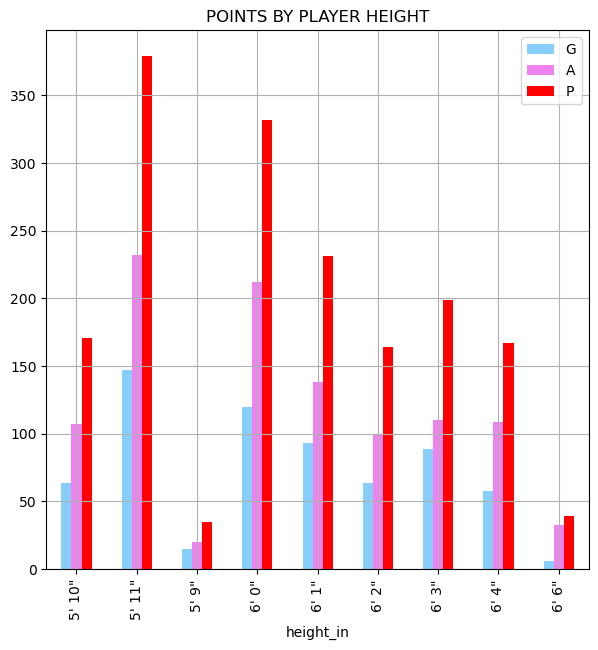

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the points by Player's Height

height_chart = player_height.plot(kind = "bar", color=["lightskyblue","violet","red"], figsize=(7,7))
plt.title("POINTS BY PLAYER HEIGHT")


plt.grid()
plt.show()
plt.tight_layout()


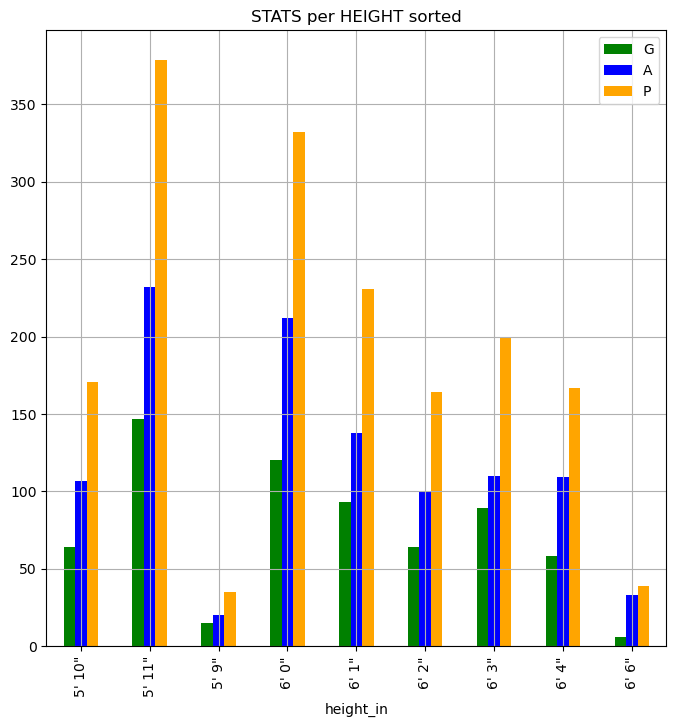

<Figure size 640x480 with 0 Axes>

In [14]:
# Bar Chart for sorted points per height from highest to lowest 

sorted_height_stats = player_height.plot(kind ="bar", color=["green", "blue", "orange"], figsize=(8,8))

plt.title("STATS per HEIGHT sorted")

plt.grid()
plt.show()
plt.tight_layout()


In [15]:
# Displaying player's point total by weight

player_weight = player_merge_df.groupby("weight_lb")["P"].sum()

player_weight.head(10)


weight_lb
166.0     42
168.0     55
170.0     94
172.0     46
175.0    120
176.0     48
178.0     67
180.0     43
181.0     90
184.0     38
Name: P, dtype: int64

In [16]:
#Plot the sorted weight stats

sorted_weight_stats = weight_chart.plot(kind="barh", color="purple", ascending=True, figsize=(8,8))
    
plt.title("STATS FOR POINTS PER WEIGHT SORTED")


plt.grid()
plt.show()
plt.tight_layout()


NameError: name 'weight_chart' is not defined

In [17]:
#Show position players and number points scored on a cummalative basis

player_position = player_merge_df.groupby("Pos")["G", "A", "P"].sum()

player_position

/var/folders/9_/7zypvl995tn69w8g5z3_xs8m0000gn/T/ipykernel_81597/2279422066.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_position = player_merge_df.groupby("Pos")["G", "A", "P"].sum()


,G,A,P
Pos,,,
C,312,517,829
D,31,142,173
L,113,144,257
R,200,258,458


In [18]:
player_weight_df = player_merge_df.groupby("weight_lb")["P"].sum()

player_weight_df.head(15)

weight_lb
166.0     42
168.0     55
170.0     94
172.0     46
175.0    120
176.0     48
178.0     67
180.0     43
181.0     90
184.0     38
187.0     47
188.0     41
189.0     40
191.0    132
192.0     54
Name: P, dtype: int64

In [20]:
player_weight_sorted = player_weight_df.sort_values(["P"], ascending=False)

player_weight_sorted.head(10)

/var/folders/9_/7zypvl995tn69w8g5z3_xs8m0000gn/T/ipykernel_81597/1450382203.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  player_weight_sorted = player_weight_df.sort_values(["P"], ascending=True)


TypeError: unhashable type: 'list'

In [ ]:
goalie_summary_df = goalie_summary_df.sort_values("Sv%", ascending=False)

goalie_summary_df.head(15)

In [ ]:
goalie_summary_df["T"] = pd.to_numeric(goalie_summary_df["T"], errors="coerce")
goalie_summary_df["TOI"] = pd.to_numeric(goalie_summary_df["TOI"], errors="coerce")



In [ ]:
goalie_summary_df.info()

In [ ]:
#Plot the Goalie stats by Wins 


goalie_wins = goalie_summary_df.plot["W"](kind="bar", figsize=(8,10), color="gold", rotation="vertical")


plt.title("GOALIE WINS")
plt.xlabel("Players")
plt.ylabel("Goalie Wins")


plt.grid()
plt.show()



In [23]:
goalie_summary_df = pd.read_excel(goalie_file, engine="openpyxl")
goalie_summary_df.head(10)

,Player,Season,Team,S/C,GP,GS,W,L,T,OT,...,Svs,GA,Sv%,GAA,TOI,SO,G,A,P,PIM
0,Adin Hill,20232024,VGK,L,15,15,10,2,--,2,...,379,27,0.933,1.93,841:08,2,0,1,1,0
1,Cam Talbot,20232024,LAK,L,26,25,14,9,--,3,...,667,56,0.923,2.17,1547:38,2,0,1,1,2
2,Charlie Lindgren,20232024,WSH,R,15,14,7,3,--,3,...,414,32,0.928,2.27,846:51,2,0,0,0,0
3,Connor Hellebuyck,20232024,WPG,L,29,29,20,6,--,3,...,765,66,0.921,2.27,1743:26,1,0,0,0,2
4,Joey Daccord,20232024,SEA,L,24,21,10,5,--,8,...,625,53,0.922,2.29,1389:46,2,0,0,0,0
5,Jeremy Swayman,20232024,BOS,L,19,19,11,3,--,4,...,530,45,0.922,2.43,1111:57,2,0,0,0,0
6,Jonathan Quick,20232024,NYR,L,14,13,9,2,--,2,...,357,33,0.915,2.44,810:41,2,0,0,0,4
7,Sergei Bobrovsky,20232024,FLA,L,30,30,20,9,--,1,...,741,72,0.911,2.45,1766:19,2,0,1,1,2
8,Samuel Ersson,20232024,PHI,L,17,16,9,5,--,3,...,394,42,0.904,2.50,1009:56,2,0,0,0,2
9,Pyotr Kochetkov,20232024,CAR,L,22,20,11,7,--,3,...,475,51,0.903,2.50,1222:26,1,0,0,0,2


In [24]:
goalie_summary_df = goalie_summary_df.sort_values("GAA", ascending=True)

goalie_summary_df.head(15)

,Player,Season,Team,S/C,GP,GS,W,L,T,OT,...,Svs,GA,Sv%,GAA,TOI,SO,G,A,P,PIM
0,Adin Hill,20232024,VGK,L,15,15,10,2,--,2,...,379,27,0.933,1.93,841:08,2,0,1,1,0
1,Cam Talbot,20232024,LAK,L,26,25,14,9,--,3,...,667,56,0.923,2.17,1547:38,2,0,1,1,2
2,Charlie Lindgren,20232024,WSH,R,15,14,7,3,--,3,...,414,32,0.928,2.27,846:51,2,0,0,0,0
3,Connor Hellebuyck,20232024,WPG,L,29,29,20,6,--,3,...,765,66,0.921,2.27,1743:26,1,0,0,0,2
4,Joey Daccord,20232024,SEA,L,24,21,10,5,--,8,...,625,53,0.922,2.29,1389:46,2,0,0,0,0
5,Jeremy Swayman,20232024,BOS,L,19,19,11,3,--,4,...,530,45,0.922,2.43,1111:57,2,0,0,0,0
6,Jonathan Quick,20232024,NYR,L,14,13,9,2,--,2,...,357,33,0.915,2.44,810:41,2,0,0,0,4
7,Sergei Bobrovsky,20232024,FLA,L,30,30,20,9,--,1,...,741,72,0.911,2.45,1766:19,2,0,1,1,2
8,Samuel Ersson,20232024,PHI,L,17,16,9,5,--,3,...,394,42,0.904,2.50,1009:56,2,0,0,0,2
9,Pyotr Kochetkov,20232024,CAR,L,22,20,11,7,--,3,...,475,51,0.903,2.50,1222:26,1,0,0,0,2


In [25]:
goalie_summary_df = goalie_summary_df.sort_values("Svs", ascending=False)

goalie_summary_df.head(15)

,Player,Season,Team,S/C,GP,GS,W,L,T,OT,...,Svs,GA,Sv%,GAA,TOI,SO,G,A,P,PIM
35,Ilya Sorokin,20232024,NYI,L,27,26,12,7,--,8,...,853,85,0.909,3.17,1607:48,2,0,1,1,0
27,Alexandar Georgiev,20232024,COL,L,33,32,21,9,--,2,...,803,95,0.895,2.98,1914:15,1,0,1,1,2
30,Juuse Saros,20232024,NSH,L,31,31,16,14,--,1,...,781,86,0.901,3.01,1711:45,2,0,0,0,0
3,Connor Hellebuyck,20232024,WPG,L,29,29,20,6,--,3,...,765,66,0.921,2.27,1743:26,1,0,0,0,2
10,Thatcher Demko,20232024,VAN,L,28,28,19,8,--,1,...,761,70,0.916,2.53,1663:09,3,0,0,0,0
31,Jordan Binnington,20232024,STL,L,28,26,13,11,--,1,...,758,80,0.905,3.05,1575:32,1,0,1,1,0
7,Sergei Bobrovsky,20232024,FLA,L,30,30,20,9,--,1,...,741,72,0.911,2.45,1766:19,2,0,1,1,2
41,Petr Mrazek,20232024,CHI,L,26,24,10,13,--,1,...,723,78,0.903,3.26,1436:12,1,0,0,0,0
38,Elvis Merzlikins,20232024,CBJ,L,23,23,7,8,--,6,...,669,69,0.907,3.25,1275:44,0,0,0,0,4
1,Cam Talbot,20232024,LAK,L,26,25,14,9,--,3,...,667,56,0.923,2.17,1547:38,2,0,1,1,2


In [21]:
defence_summary_df = pd.read_excel(defence_file, engine="openpyxl")
defence_summary_df.head(10)

,Player,Season,Team,S/C,Pos,GP,G,A,P,+/-,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Quinn Hughes,20232024,VAN,L,D,39,10,39,49,26,...,1,17,0,0,1,2,98,10.2,24:34,--
1,Cale Makar,20232024,COL,R,D,35,9,38,47,8,...,4,21,0,3,0,0,103,8.7,24:34,--
2,Evan Bouchard,20232024,EDM,R,D,36,9,30,39,2,...,4,19,0,0,0,3,106,8.5,22:42,--
3,Victor Hedman,20232024,TBL,L,D,39,6,33,39,-4,...,3,17,0,0,0,1,80,7.5,24:27,--
4,Noah Dobson,20232024,NYI,R,D,39,6,32,38,20,...,1,15,0,1,0,2,89,6.7,25:53,--
5,Vince Dunn,20232024,SEA,L,D,39,7,26,33,-3,...,3,12,0,1,0,0,75,9.3,23:20,--
6,Rasmus Dahlin,20232024,BUF,L,D,39,12,20,32,-13,...,3,10,0,0,0,1,116,10.3,24:57,--
7,Roman Josi,20232024,NSH,L,D,40,8,23,31,-1,...,4,15,0,1,1,1,131,6.1,24:29,--
8,Morgan Rielly,20232024,TOR,L,D,37,4,26,30,2,...,1,11,0,0,0,0,87,4.6,24:32,--
9,Josh Morrissey,20232024,WPG,L,D,39,6,24,30,21,...,1,8,0,0,0,1,103,5.8,24:18,--


In [22]:
defence_icetime_df = defence_summary_df.sort_values("TOI/GP", ascending=False)

defence_icetime_df.head(10)

,Player,Season,Team,S/C,Pos,GP,G,A,P,+/-,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
32,Drew Doughty,20232024,LAK,R,D,36,7,13,20,11,...,1,6,0,0,1,3,68,10.3,26:03,--
4,Noah Dobson,20232024,NYI,R,D,39,6,32,38,20,...,1,15,0,1,0,2,89,6.7,25:53,--
24,John Carlson,20232024,WSH,R,D,38,3,20,23,1,...,1,9,0,0,0,1,84,3.6,25:34,--
42,Cam Fowler,20232024,ANA,L,D,39,2,16,18,-19,...,0,8,0,0,0,0,54,3.7,25:10,--
14,Mike Matheson,20232024,MTL,L,D,39,6,21,27,-9,...,4,15,0,0,0,0,97,6.2,25:04,--
12,Miro Heiskanen,20232024,DAL,L,D,37,4,23,27,-2,...,1,10,0,0,0,1,78,5.1,25:03,--
6,Rasmus Dahlin,20232024,BUF,L,D,39,12,20,32,-13,...,3,10,0,0,0,1,116,10.3,24:57,--
37,Brock Faber,20232024,MIN,R,D,38,2,17,19,9,...,1,4,0,0,0,1,56,3.6,24:48,--
16,Kris Letang,20232024,PIT,R,D,38,3,23,26,9,...,0,2,0,0,0,0,80,3.8,24:44,--
20,Travis Sanheim,20232024,PHI,L,D,38,4,21,25,-9,...,0,4,0,2,0,2,69,5.8,24:43,--
